# Predict an image
in this notebook you can predict an image and see the result given a model

In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
%cd gdrive
%cd MyDrive

[Errno 2] No such file or directory: 'gdrive'
/content/gdrive/MyDrive/Epfl/spacewarp
[Errno 2] No such file or directory: 'MyDrive'
/content/gdrive/MyDrive/Epfl/spacewarp


In [57]:
%cd Epfl
%cd spacewarp

[Errno 2] No such file or directory: 'Epfl'
/content/gdrive/MyDrive/Epfl/spacewarp
[Errno 2] No such file or directory: 'spacewarp'
/content/gdrive/MyDrive/Epfl/spacewarp


In [58]:
#model_path = "Results/135_normal/model_008100.h5"
#model_path = "Results/153_normal/Copy of model_015300.h5"
path_test = 'Data/test_data/'
model_path = 'Results/135_mirror/'
model = 'model_016200.h5'
img_test = '000020139-1.jpg'


Loaded (1, 512, 512, 3)


1/1 [==============================] - 2s 2s/step


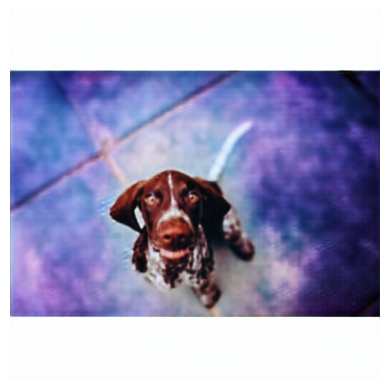

In [59]:
# example of loading a pix2pix model and using it for one-off image translation
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import save_img
from numpy import load
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image

# load an image
def load_image(filename, size=(512,512)):
	# load image with the preferred size
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	# reshape to 1 sample
	pixels = expand_dims(pixels, 0)
	return pixels

# load source image
src_image = load_image(path_test+img_test)
print('Loaded', src_image.shape)
# load model
model = load_model(model_path+model)
# generate image from source
gen_image = model.predict(src_image)
# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0
# plot the image
pyplot.imshow(gen_image[0])
pyplot.axis('off')
pyplot.show()


